In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import os, ast
from tqdm import tqdm
from PIL import Image
import argparse
import os 
from tqdm import tqdm

In [2]:
def action2step(action, image_size, return_bbox=False):
    action_type = action["operation"]["original_op"]
    assert action_type in ['CLICK', 'TYPE', 'SELECT', 'HOVER', 'ENTER']

    point_x = action["bbox"]["x"] + (action["bbox"]["width"] / 2)
    point_y = action["bbox"]["y"] + (action["bbox"]["height"] / 2)
    click_point = [point_x / image_size[0], point_y / image_size[1]]
    click_point = [round(item, 3) for item in click_point]
    click_point = [f"{item:.2f}" for item in click_point]
    click_point = "({},{})".format(click_point[0], click_point[1])

    if return_bbox:
        bbox = [action["bbox"]["x"], action["bbox"]["y"], action["bbox"]["x"] + action["bbox"]["width"],
                action["bbox"]["y"] + action["bbox"]["height"]]
        bbox = [bbox[0] / image_size[0], bbox[1] / image_size[1], bbox[2] / image_size[0], bbox[3] / image_size[1]]
        bbox = [round(item, 3) for item in bbox]

    if action_type in ['CLICK', 'HOVER', 'ENTER']:
        action_step = "{{\"action_type\": {}, \"click_point\": {}}}".format(4, click_point)
    elif action_type == 'SELECT':
        select_value = action["operation"]["value"]
        action_step = "{{\"action_type\": {}, \"click_point\": {}, \"value\": \"{}\"}}".format(2, click_point,
                                                                                               select_value)
    elif action_type == 'TYPE':
        typed_text = action["operation"]["value"]
        action_step = "{{\"action_type\": {}, \"click_point\": {}, \"value\": \"{}\"}}".format(3, click_point,
                                                                                               typed_text)

    if return_bbox:
        return action_step, bbox
    else:
        return action_step


In [3]:
task = 'website'
mind2web_imgs_dir = '/data/data1/syc/intern/wanshan/mind2map_dataset/mind2web_images'
mind2web_train = json.load(open('/data/data1/syc/intern/wanshan/mind2map_dataset/mind2web_data_train.json', 'r'))

In [17]:
ref = []
for episode in tqdm(mind2web_train):
    goal = episode["confirmed_task"]
    annot_id = episode["annotation_id"]
    previous_actions = []
    results_actions = []

    for j, step in enumerate(episode["actions"]):
        if "bbox" not in step:
            print("action not found")
            continue

        filename = annot_id + '-' + step["action_uid"] + '.jpg'
        img_path = os.path.join(mind2web_imgs_dir, filename)
        if not os.path.exists(img_path):
            print("img not found")
            continue
        image = Image.open(img_path)

        previous_step = ""
        for i, action in enumerate(previous_actions[-4:]):
            previous_step += 'Step' + str(i) + ': ' + action + ". "

        action_step = action2step(step, image.size)
        previous_actions.append(action_step)

        # prompt = prompt_origin.format(goal, previous_step)

        action_step_ref, bbox_ref = action2step(step, image.size, return_bbox=True)
        try:
            action_step_ref = ast.literal_eval(action_step_ref)
        except:
            continue
        step_ref = {"annot_id": annot_id, "img_path": img_path, "instruction": goal,
                       "bbox_ref": bbox_ref, "action_step_ref": action_step_ref, 'previous_steps': previous_step}
        results_actions.append(step_ref)
    ref.append(results_actions)

df = [item for sublist in ref for item in sublist]
df = pd.DataFrame(df)

  0%|          | 0/1009 [00:00<?, ?it/s]

 19%|█▉        | 192/1009 [00:00<00:01, 646.70it/s]

action not found
action not found
action not found


 39%|███▉      | 393/1009 [00:00<00:00, 639.97it/s]

action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found


 54%|█████▎    | 542/1009 [00:00<00:00, 694.31it/s]

action not found
action not found
action not found
action not found
action not found
action not found


 67%|██████▋   | 679/1009 [00:01<00:00, 648.49it/s]

action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found


 87%|████████▋ | 882/1009 [00:01<00:00, 651.89it/s]

action not found
action not found
action not found
action not found
action not found
action not found


100%|██████████| 1009/1009 [00:01<00:00, 647.43it/s]

action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found
action not found


In [18]:
df.head()

,annot_id,img_path,instruction,bbox_ref,action_step_ref,previous_steps
0,e7e1616e-dd5f-4eb4-a7f1-b757c7880877,/data/data1/syc/intern/wanshan/mind2map_datase...,Look up the scores for the previous day's NBA ...,"[0.148, 0.092, 0.178, 0.151]","{'action_type': 4, 'click_point': (0.16, 0.12)}",
1,e7e1616e-dd5f-4eb4-a7f1-b757c7880877,/data/data1/syc/intern/wanshan/mind2map_datase...,Look up the scores for the previous day's NBA ...,"[0.155, 0.219, 0.312, 0.276]","{'action_type': 4, 'click_point': (0.23, 0.25)}","Step0: {""action_type"": 4, ""click_point"": (0.16..."
2,e7e1616e-dd5f-4eb4-a7f1-b757c7880877,/data/data1/syc/intern/wanshan/mind2map_datase...,Look up the scores for the previous day's NBA ...,"[0.259, 0.47, 0.28, 0.49]","{'action_type': 4, 'click_point': (0.27, 0.48)}","Step0: {""action_type"": 4, ""click_point"": (0.16..."
3,cc174cb2-520d-49c3-93da-f93a1c485c03,/data/data1/syc/intern/wanshan/mind2map_datase...,Calculate the fare options to go from the sout...,"[0.375, 0.025, 0.441, 0.075]","{'action_type': 4, 'click_point': (0.41, 0.05)}",
4,cc174cb2-520d-49c3-93da-f93a1c485c03,/data/data1/syc/intern/wanshan/mind2map_datase...,Calculate the fare options to go from the sout...,"[0.125, 0.164, 0.303, 0.214]","{'action_type': 4, 'click_point': (0.21, 0.19)}","Step0: {""action_type"": 4, ""click_point"": (0.41..."


In [24]:
def draw_rectangle(ax, bbox, img_width, img_height):
        """Draws a rectangle on the given axes."""
        x_min = bbox[0] * img_width
        y_min = bbox[1] * img_height
        x_max = bbox[2] * img_width
        y_max = bbox[3] * img_height
        rect_width = x_max - x_min
        rect_height = y_max - y_min

        rect = patches.Rectangle((x_min, y_min), rect_width, rect_height, 
                                linewidth=2, edgecolor='green', facecolor='none')
        ax.add_patch(rect)

In [25]:
def draw_click_point(ax, click_point, img_width, img_height):
    """Draws a click point on the given axes."""
    x = click_point[0] * img_width
    y = click_point[1] * img_height
    ax.scatter(x, y, c='red', s=50, edgecolor='black')

In [26]:
def save_images_with_annotations(annot_id, imgs_list, bboxes, ref_acts, instructions, output_dir):
    for i, img_path in tqdm(enumerate(imgs_list), total=len(imgs_list), desc="Saving output images"):
        fig, ax = plt.subplots(figsize=(10, 5))
        img = mpimg.imread(img_path)
        img_height, img_width, _ = img.shape
        
        # Plot the image
        ax.imshow(img)

        # Draw rectangle bbox
        draw_rectangle(ax, bboxes[i], img_width, img_height)

        # Add text at the top of the image
        ax.text(0, 1.10, f'annot_id {annot_id[i]}', 
                    color='blue', transform=ax.transAxes, fontsize=10, ha='left')
        ax.text(0, 1.06, f'Reference: {ref_acts[i]},',
                    color='green', transform=ax.transAxes, fontsize=10, ha='left')
        ax.text(0, 1.02, f'Instruction: {instructions[i]}',
                    color='black', transform=ax.transAxes, fontsize=10, ha='left')

        # Hide the axis
        ax.axis('off')

        # Save the image with annotation
        output_path = os.path.join(output_dir, f'image_{i+1}.png')
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        
        # Close the figure to free up memory
        plt.close(fig)

  0%|          | 0/200 [00:00<?, ?it/s]

website is processing .....


  0%|          | 0/200 [10:35<?, ?it/s]


KeyboardInterrupt: 

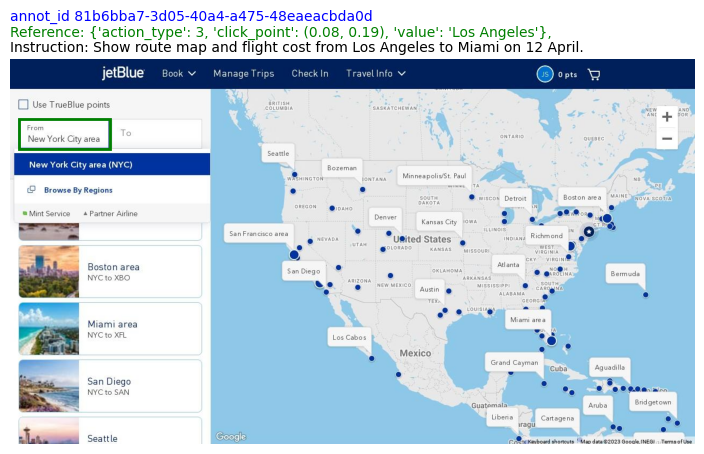

In [27]:

# Saving images 
out_dir = '/home/syc/intern/wanshan/visualize_mind2web/train-virt'
for i in tqdm(df[:200]):
    imgs_output_dir = f'{out_dir}/{task}'
    print(f'{task} is processing .....')
    os.makedirs(imgs_output_dir, exist_ok=True)

    imgs_list = df['img_path']
    # op_f1 = filtered_df['Op_F1'].tolist()
    # acts = filtered_df['sentence'].tolist()
    annot_id = df['annot_id']
    ref_acts = df['action_step_ref'].tolist()
    bboxes = df['bbox_ref'].tolist()
    instructions = df['instruction'].tolist()

    # acts_type -> operation
    operations = [' ', ' ' , 'SELECT', 'TYPE','CLICK-HOVER-ENTER']
    save_images_with_annotations(annot_id, imgs_list, bboxes, ref_acts, instructions, imgs_output_dir)
    df.to_json(f"{imgs_output_dir}/{task}_annot.json", indent=4)